# Countour 2D plot of experimental data set

There is set of experimental data files: 

- S-curve168.txt 
- ...
- S-curve468.txt.

Each file corresponds to the specific magnetic field applied during the measurement (fields set: 7 - 10 mT, step 0.01 mT).

File contains 2 columns: changing parameter (level) and response of the sample (critical current).

__2D map: X: level, Y: magnetic field, Z: current__

In [8]:
#%matplotlib qt

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
files = np.arange(168,468,1)
len(files)

300

In [4]:
levels = []
currents = []

for file in files:
    path='S-curves/S-curve'+str(file)+'.txt'
    with open(path, 'r') as f:
        rawdata = np.array([float(i) for i in f.read().split()])
        levels.append(rawdata[0::2])
        currents.append(rawdata[1::2])

In [5]:
#single set of fields
fields = np.linspace(7,10,300)
len(fields)

300

In [7]:
#Building 2D array of fields for plot
fields2D = []
for i in range(101):
    fields2D.append(fields)
fields2D = np.transpose(fields2D)

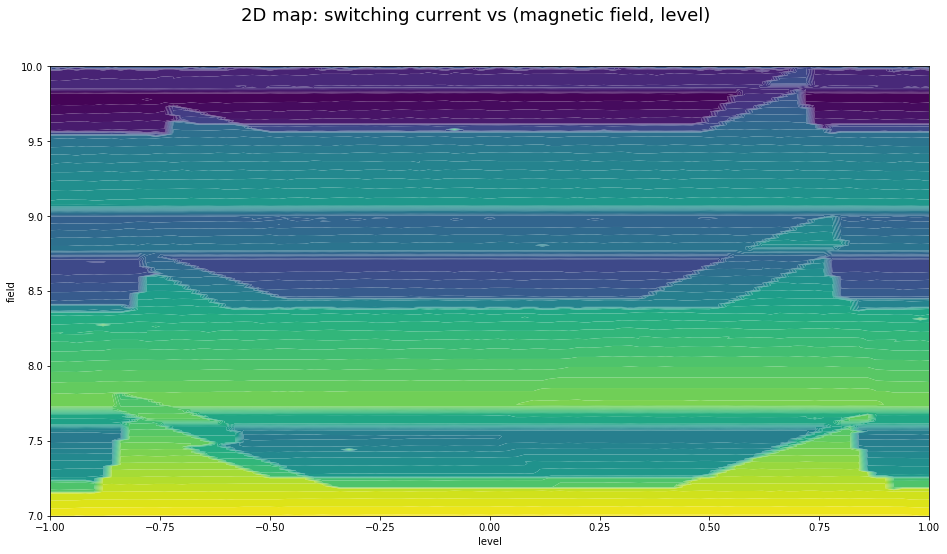

In [31]:
plt.figure(0)
pic1 = plt.contourf(levels, fields2D, currents, 50, cmap = 'viridis', antialiased=True)
plt.xlabel('level')
plt.ylabel('field')
h,l = pic1.legend_elements("I")
#plt.legend(h, l, fontsize=8)
figsize = (40/2.54,21/2.54) # in inches
plt.figure(0).set_size_inches(figsize)
plt.suptitle('2D map: switching current vs (magnetic field, level)', fontsize=18)
plt.show()